## Sampling-based vs. Anytime Planners
In this notebook, we investigate the trade-off between sampling-based and anytime planners to compare the results from an anytime planner against the sampling-based planner in combination with a post-smoothing method. They could take approximately the same time and maybe it is beneficial to have a fast planner and an efficitive post-smoothing step vs. a single anytime planner.

In [17]:
%load_ext autoreload
%autoreload 2
import mpb
from mpb import MPB, MultipleMPB
from definitions import all_planners, sampling_planners, \
                        anytime_planners, sbpl_planners

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
pool = MultipleMPB()
for planner in sampling_planners:
    m = MPB()
    m.set_corridor_grid_env(width=150, height=150, branches=100, radius=4)
    m.set_planners([planner])
    m.set_steer_functions(['reeds_shepp'])
    m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
    m.set_id('sampling_%s' % planner)
    pool.benchmarks.append(m)    

for planner in anytime_planners:
    for max_time in [5, 10, 15, 30, 45, 60]:
        m = MPB()
        m.set_corridor_grid_env(width=150, height=150, branches=100, radius=4)
        m.set_planners([planner])
        m.set_steer_functions(['reeds_shepp'])
        m["max_planning_time"] = max_time
        m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
        m.set_id('anytime_%s_%i' % (planner, max_time))
        pool.benchmarks.append(m)
pool.run_parallel('sam_vs_any', runs=5)

Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_templat

Benchmark 4 (sampling_theta_star) finished successfully.

Benchmark 40 (anytime_bfmt_5) finished successfully.

Benchmark 52 (anytime_bit_star_5) finished successfully.

Benchmark 58 (anytime_spars_5) finished successfully.

Benchmark 16 (anytime_rrt_sharp_5) finished successfully.

Benchmark 10 (anytime_rrt_star_5) finished successfully.

Benchmark 28 (anytime_sorrt_star_5) finished successfully.

Benchmark 46 (anytime_cforest_5) finished successfully.

Benchmark 22 (anytime_informed_rrt_star_5) finished successfully.

Benchmark 64 (anytime_spars2_5) finished successfully.
Killed anytime_prm_star_5 with planner prm_star after 50.01s exceeded timeout.


Error (-9) occurred for MPB with ID anytime_prm_star_5 using planner prm *.


Benchmark 34 (anytime_prm_star_5) failed. Return code: -1.



Benchmark 41 (anytime_bfmt_10) finished successfully.


Benchmark 53 (anytime_bit_star_10) finished successfully.
Benchmark 2 (sampling_sbl) finished successfully.

Benchmark 59 (anytime_spars_10) finished successfully.

Benchmark 47 (anytime_cforest_10) finished successfully.

Benchmark 17 (anytime_rrt_sharp_10) finished successfully.

Benchmark 23 (anytime_informed_rrt_star_10) finished successfully.

Benchmark 11 (anytime_rrt_star_10) finished successfully.

Benchmark 29 (anytime_sorrt_star_10) finished successfully.

Benchmark 6 (sampling_fmt) finished successfully.

Benchmark 65 (anytime_spars2_10) finished successfully.

Benchmark 35 (anytime_prm_star_10) finished successfully.

Benchmark 44 (anytime_bfmt_45) finished successfully.


Benchmark 45 (anytime_bfmt_60) finished successfully.
Benchmark 42 (anytime_bfmt_15) finished successfully.

Benchmark 7 (sampling_kpiece) finished successfully.

Benchmark 54 (anytime_bit_star_15) finished successfully.

Benchmark 1 (sampling_est) 

Error(s) occurred, not all benchmarks succeeded.
Benchmark 34 failed with return code -1. See log file sam_vs_any/anytime_prm_star_5.log.


False

/root/code/mpb/plotting/trajectory.py:71: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


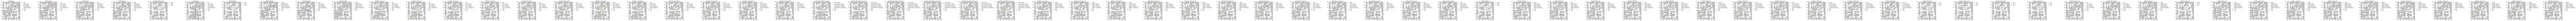

In [11]:
pool.visualize_trajectories(run_id='1', show_smoother=True, show_legend=True)

In [28]:
from copy import copy
from definitions import planner_names
plan_names = list(map(lambda p: planner_names[p], sampling_planners))
for planner in anytime_planners:
    for max_time in [5, 10, 15, 30, 45, 60]:
        plan_names.append("%s %02is" % (planner_names[planner], max_time))
MPB.merge(pool.benchmarks, "sampling_vs_anytime.json", plan_names=plan_names)

Successfully merged [sam_vs_any/sampling_rrt_results.json, sam_vs_any/sampling_est_results.json, sam_vs_any/sampling_sbl_results.json, sam_vs_any/sampling_prm_results.json, sam_vs_any/sampling_theta_star_results.json, sam_vs_any/sampling_sst_results.json, sam_vs_any/sampling_fmt_results.json, sam_vs_any/sampling_kpiece_results.json, sam_vs_any/sampling_pdst_results.json, sam_vs_any/sampling_stride_results.json, sam_vs_any/anytime_rrt_star_5_results.json, sam_vs_any/anytime_rrt_star_10_results.json, sam_vs_any/anytime_rrt_star_15_results.json, sam_vs_any/anytime_rrt_star_30_results.json, sam_vs_any/anytime_rrt_star_45_results.json, sam_vs_any/anytime_rrt_star_60_results.json, sam_vs_any/anytime_rrt_sharp_5_results.json, sam_vs_any/anytime_rrt_sharp_10_results.json, sam_vs_any/anytime_rrt_sharp_15_results.json, sam_vs_any/anytime_rrt_sharp_30_results.json, sam_vs_any/anytime_rrt_sharp_45_results.json, sam_vs_any/anytime_rrt_sharp_60_results.json, sam_vs_any/anytime_informed_rrt_star_5_re

Visualizing sampling_vs_anytime.json...
Saved sampling_vs_anytime_planners.pdf.


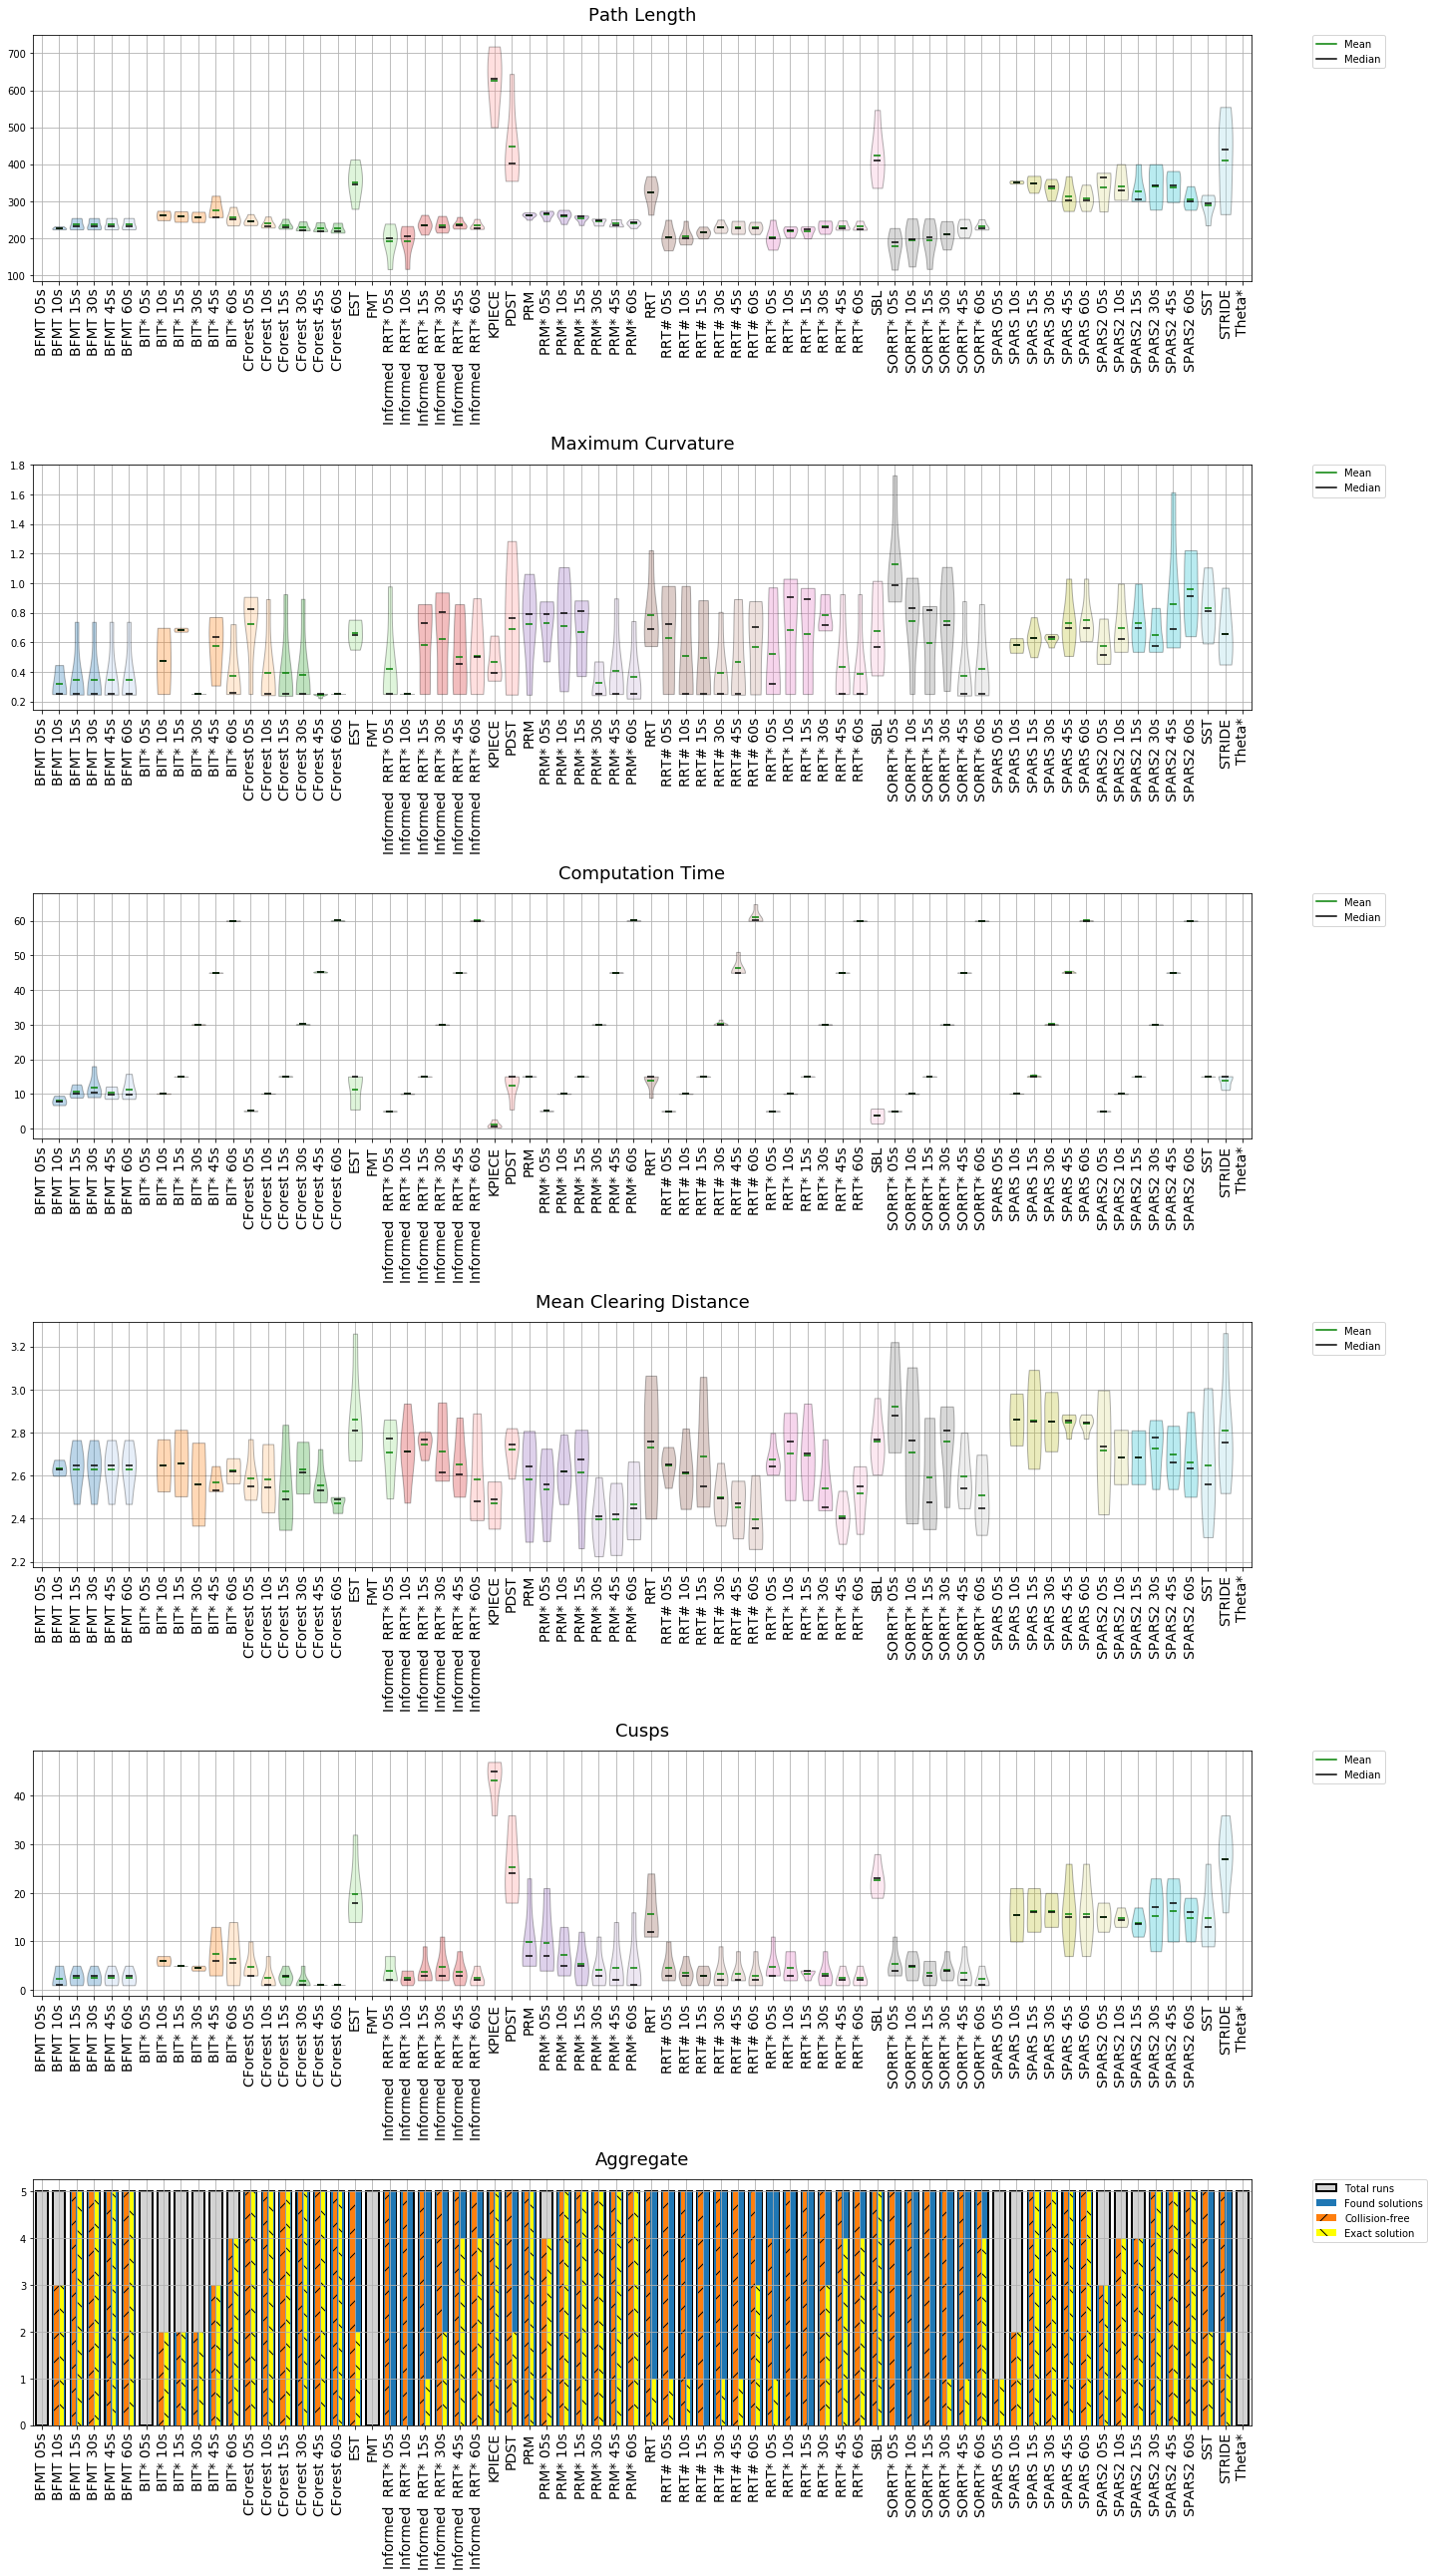

In [33]:
from plot_stats import plot_planner_stats
plot_planner_stats("sampling_vs_anytime.json", fig_width=20, max_plots_per_line=1, save_file='sampling_vs_anytime_planners.pdf')

Visualizing sampling_vs_anytime.json...
Saved sampling_vs_anytime_smoothers.pdf.


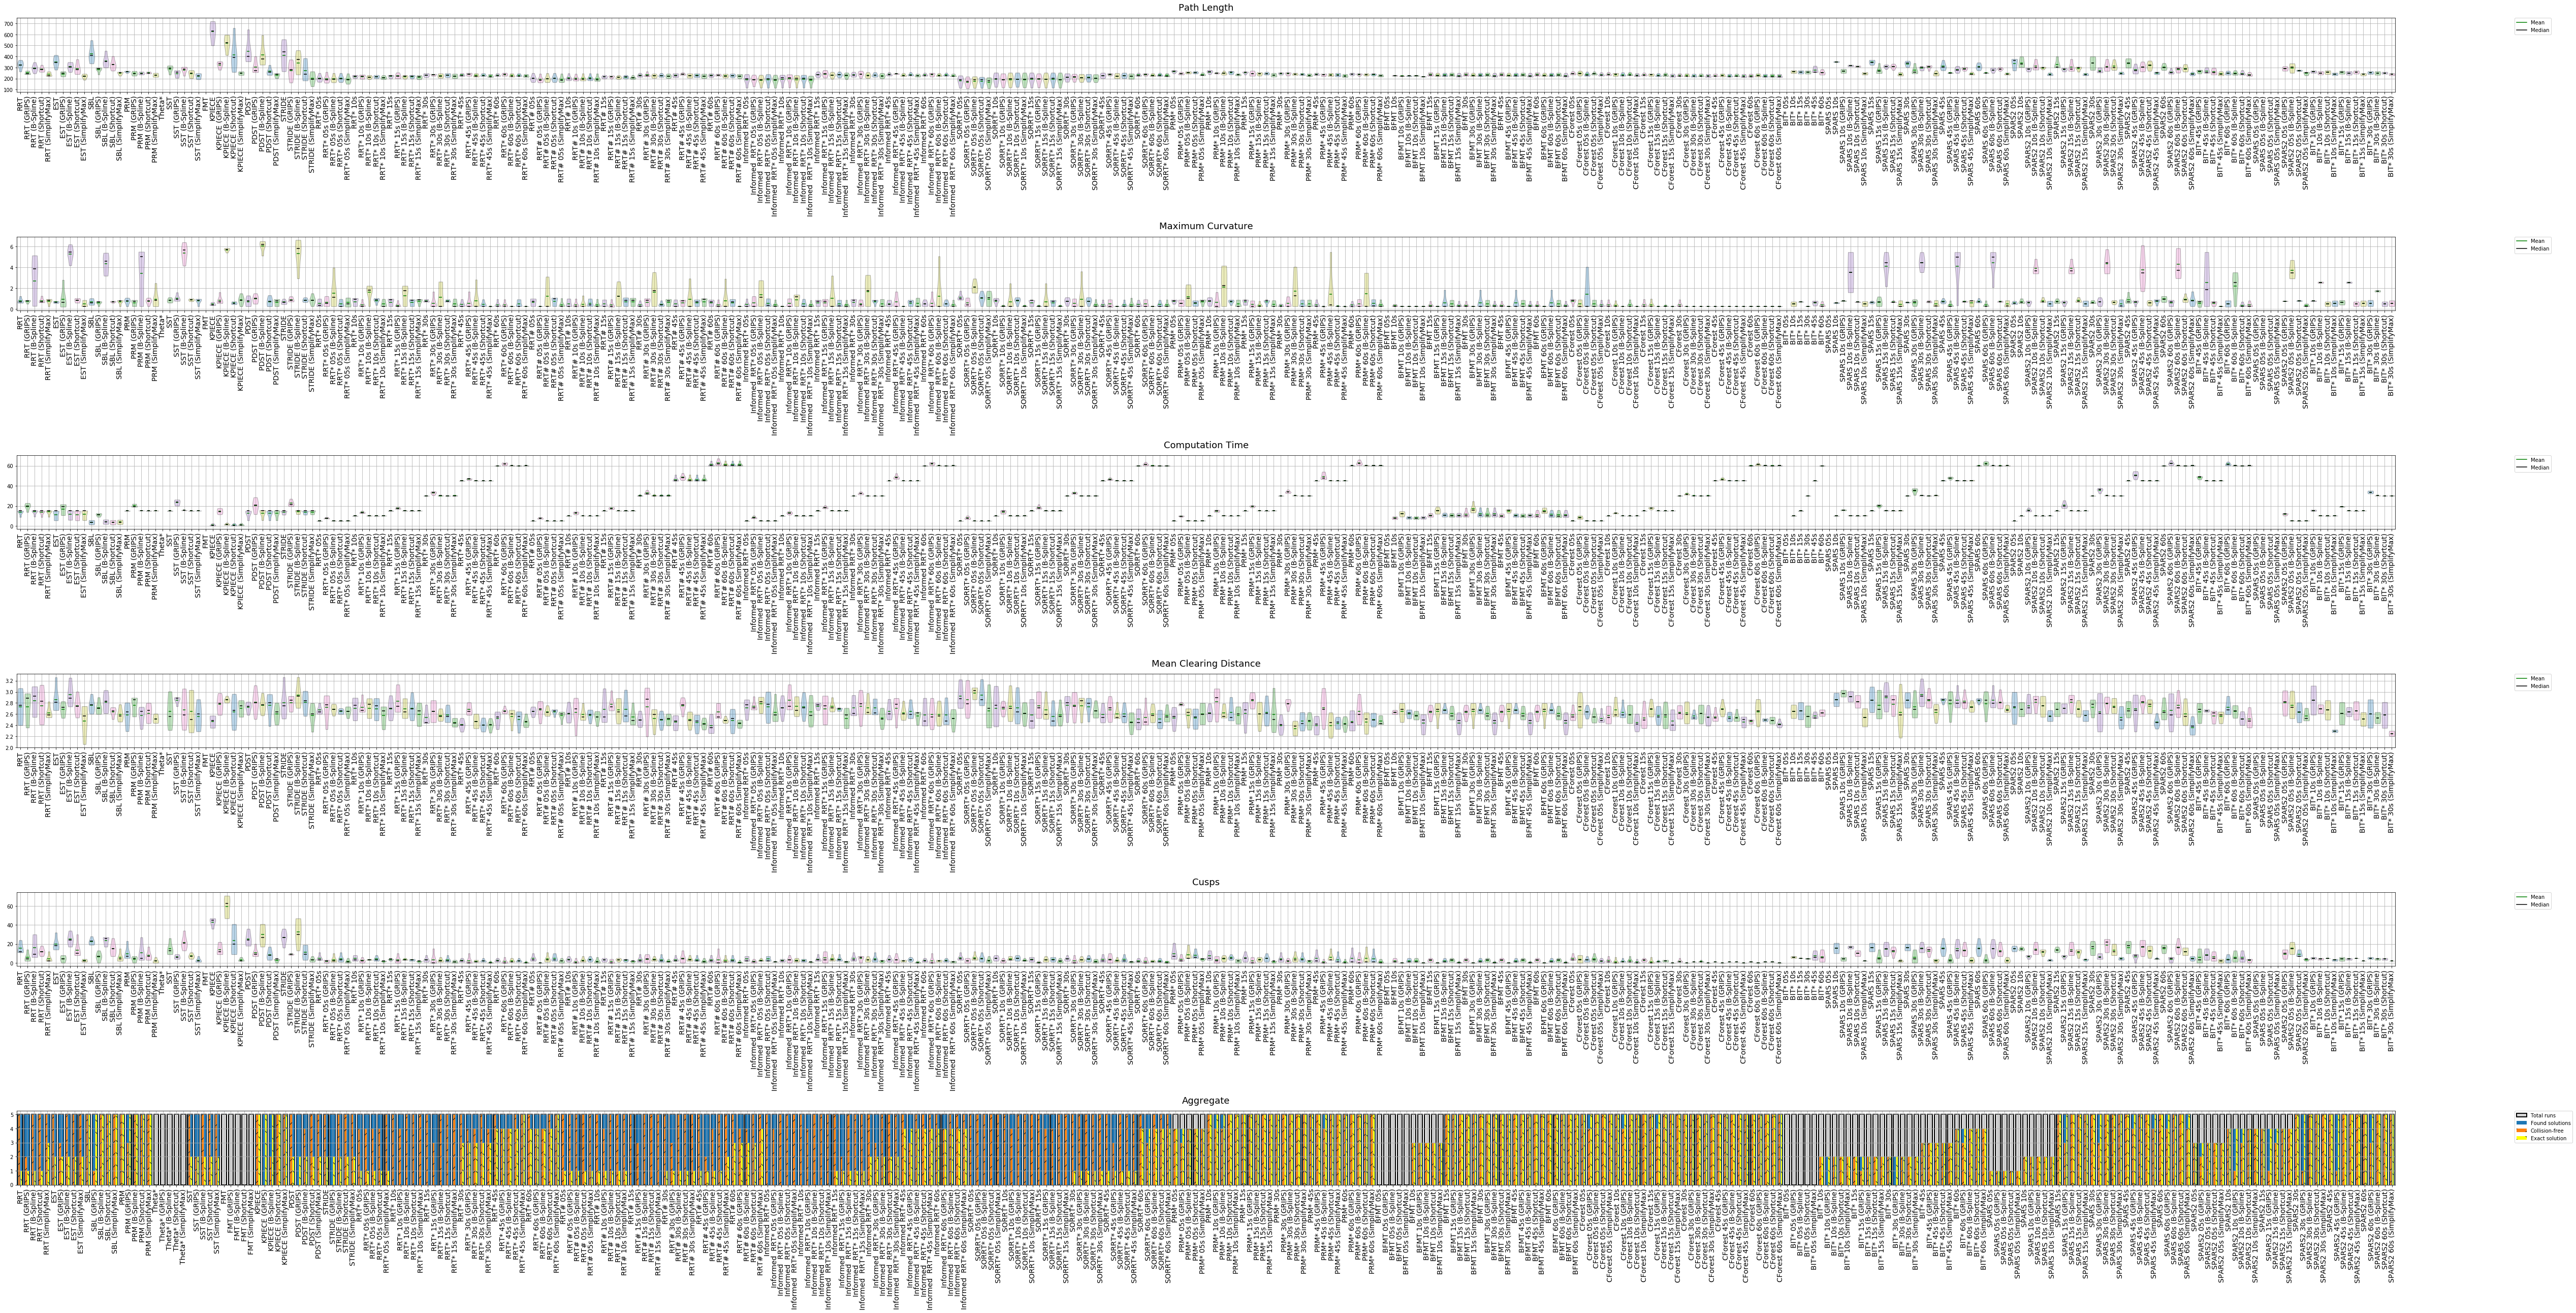

In [34]:
from plot_stats import plot_smoother_stats
plot_smoother_stats("sampling_vs_anytime.json", fig_width=70, max_plots_per_line=1, save_file='sampling_vs_anytime_smoothers.pdf', num_colors=5)